Session - Random Forest 
==

### 1_데이터 및 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
import xgboost
%matplotlib inline
from sklearn import datasets
import seaborn as sns

iris = datasets.load_iris()

### 2_Data split

In [2]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(iris.data, columns=iris.feature_names)

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, 
                                                    test_size=0.25, stratify=iris.target, random_state=123456)

### 3_모델

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

### 4_test set에 적합하기

In [4]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test) 
accuracy = accuracy_score(y_test, predicted) 

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.921


### 5_confusion matrix로 분류 결과 시각화

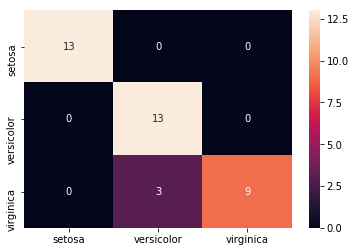

In [5]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)

sns.heatmap(cm, annot=True) 

Quest - Xgboost
=========

### 1_xgboost 모델 만들기

In [6]:
import xgboost as xgb

clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### 2_test set에 적합

In [7]:
# Mean Accuracy 측정
from sklearn.metrics import accuracy_score

predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted) 

print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.947


C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 3_confusion matrix로 분류 결과 시각화

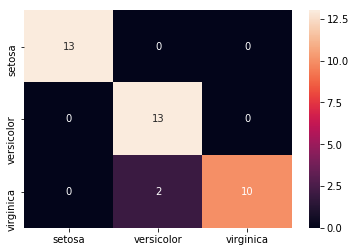

In [8]:
# sklearn에서 confusion_matrix 함수 불러오기
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)

# column은 predicted, row는 y_test
sns.heatmap(cm, annot=True) 

### 4_Random forest와 Xgboost의 결과 비교

#### 대체로 Xgboost 모델이 Random forest 모델보다 향상된 퍼포먼스를 보였다. 
####  먼저, Mean accuracy score 측면에서 Xgboost 모델이 Random forest 모델보다 0.026 높은 예측 정확도를 보였다. Random forest 의 Mean accuracy score은 0.921이나, Xgboost 모델의 Mean accuracy score는 0.947였다.
#### 또한 Confusion matrix에서도 Xgboost 모델이 versicolor와 virginica를 보다 더 잘 분류하고 있음을 확인할 수 있다. Random forest에서의 verginica 인식 오류는 3이나, Xgboost에서의 verginica 인식 오류는 2로 1 감소하였다.
#### 즉, 해당 데이터셋에서는 Random forest의 기반이 되는 Bagging 앙상블 방법보다, Xgboost의 기반이 되는 Boosting 앙상블 방법이 더 높은 예측력을 보인다.